In [160]:
import pandas as pd
import numpy as np

colnames = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution']+\
        ['physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban']+\
        ['aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending']+\
        ['superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
votes = pd.read_csv('house-votes-84.data', names=colnames)
votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


## Problem 1

In [257]:
# Replace strings with numerical values
y = votes['party']
X = votes.ix[:,1:].copy()
#X.replace({'y': 1, 'n': 0, '?':np.nan})
X.replace(to_replace=['y','n','?'], value=[1,0,np.nan], inplace=True)
X = X.apply(pd.to_numeric, axis=0)

In [258]:
meanvotes = X.T.mean()
X = X.T.fillna(meanvotes).T
X.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1,0,1.0,1.0,1,0,0,0,1,0.6,1.000000,1,1,0,1.000000
1,0.0,1,0,1.0,1.0,1,0,0,0,0,0.0,1.000000,1,1,0,0.466667
2,0.5,1,1,0.5,1.0,1,0,0,0,0,1.0,0.000000,1,1,0,0.000000
3,0.0,1,1,0.0,0.4,1,0,0,0,0,1.0,0.000000,1,0,0,1.000000
4,1.0,1,1,0.0,1.0,1,0,0,0,0,1.0,0.666667,1,1,1,1.000000


## Problem 2

In [163]:
# Get rid of bad rows
tmp = pd.concat([y,X], axis=1).dropna(axis=0,how='any')
y = tmp['party']
X = tmp.ix[:,1:]

# Split training and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Problem 3

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc = []
for k in range(1,21):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, knn.predict(X_test)))
print "Best K value: %d"%(acc.index(max(acc))+1)

Best K value: 6


In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, knn.predict(X_test)))
print "Best K value: %d (%.3f)"%(acc.index(max(acc))+1, max(acc))

Best K value: 6 (0.945)


## Problem 4

In [173]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print "Logistique Regression accuracy: %.3f"%accuracy_score(y_test, lr.predict(X_test))

Logistique Regression accuracy: 0.991


## Problem 5

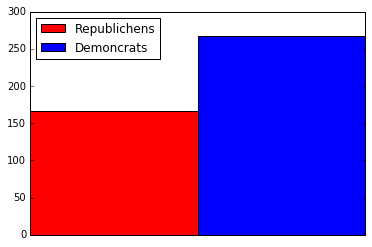

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
rects1 = ax.bar([0], [sum(y=='republican')], 0.5, color='r')
rects2 = ax.bar([0.5], [sum(y=='democrat')], 0.5, color='b')
ax.legend((rects1[0], rects2[0]), ('Republichens', 'Demoncrats'), loc="upper left")
ax.set_xticks([])
plt.show()

In [194]:
def alwaysd(X):
    return ["democrat"]*len(X)
def alwaysr(X):
    return ["republican"]*len(X)

print "Always democrat accuracy: %.3f"%accuracy_score(y_test, alwaysd(X_test))
print "Always republican accuracy: %.3f"%accuracy_score(y_test, alwaysr(X_test))

Always democrat accuracy: 0.642
Always republican accuracy: 0.358


## Problem 6

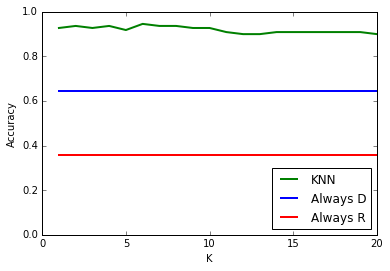

In [209]:
fig, ax = plt.subplots()
l1 = plt.plot(range(1,21), acc, 'g', linewidth=2)
l2 = plt.plot(range(1,21), [accuracy_score(y_test, alwaysd(X_test))]*20, 'b', linewidth=2)
l3 = plt.plot(range(1,21), [accuracy_score(y_test, alwaysr(X_test))]*20, 'r', linewidth=2)
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
ax.set_ylim([0,1])
ax.legend(['KNN', 'Always D', 'Always R'], loc='lower right')
plt.show()

## Problem 7

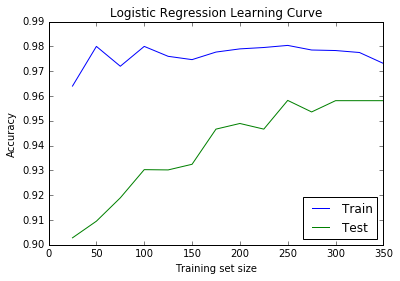

In [237]:
from sklearn.learning_curve import learning_curve

(train_size, train_err, ts_err) = learning_curve(LogisticRegression(), X, y, train_sizes=range(25,351,25),cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

fig, ax = plt.subplots()
ax.plot(train_size, train_cv_err)
ax.plot(train_size, test_cv_err)
ax.legend(['Train', 'Test'], loc='lower right')
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Learning Curve')
plt.show()

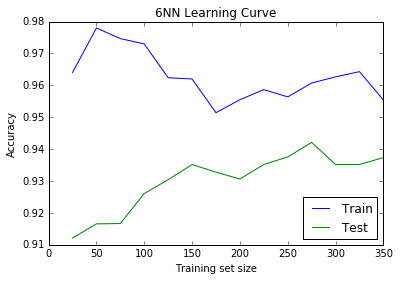

In [238]:
(train_size, train_err, ts_err) = learning_curve(KNeighborsClassifier(n_neighbors=6), X, y, train_sizes=range(25,351,25),cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

fig, ax = plt.subplots()
ax.plot(train_size, train_cv_err)
ax.plot(train_size, test_cv_err)
ax.legend(['Train', 'Test'], loc='lower right')
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.set_title('6NN Learning Curve')
plt.show()

## Problem 8

In [241]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print "GaussianNB: %.3f"%(accuracy_score(y_test, gnb.predict(X_test)))

svc = SVC()
svc.fit(X_train, y_train)
print "SVC: %.3f"%(accuracy_score(y_test, svc.predict(X_test)))

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print "DecisionTreeClassifier: %.3f"%(accuracy_score(y_test, dtc.predict(X_test)))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print "RandomForestClassifier: %.3f"%(accuracy_score(y_test, rfc.predict(X_test)))

GaussianNB: 0.936
SVC: 0.954
DecisionTreeClassifier: 0.917
RandomForestClassifier: 0.982


## Problem 9

In [247]:
from sklearn.cross_validation import cross_val_score

mod = KNeighborsClassifier(n_neighbors=6)
print "6NN: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = LogisticRegression()
print "LogisticRegression: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = GaussianNB()
print "GaussianNB: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = SVC()
print "SVC: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = DecisionTreeClassifier()
print "DecisionTreeClassifier: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = RandomForestClassifier()
print "RandomForestClassifier: %.3f"%(np.mean(cross_val_score(mod,X,y)))



6NN: 0.933
LogisticRegression: 0.963
GaussianNB: 0.935
SVC: 0.954
DecisionTreeClassifier: 0.947
RandomForestClassifier: 0.954


## Problem 10

In [283]:
colnames = ['party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution']+\
        ['physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban']+\
        ['aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending']+\
        ['superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
votes = pd.read_csv('house-votes-84.data', names=colnames)

# Replace strings with numerical values
party = votes['party']
votes = votes.ix[:,1:].copy()
#X.replace({'y': 1, 'n': 0, '?':np.nan})
votes.replace(to_replace=['y','n','?'], value=[1,0,np.nan], inplace=True)
votes = votes.apply(pd.to_numeric, axis=0)

In [293]:
voteno = 4
colname = votes.columns[1]
print colname

# Drop representitives who didn' vote on this issue
X = votes.dropna(axis=0, how='any', subset=[colname])

# Separate y and X
y = X[colname]
X = X.drop(colname, axis=1)

# Fill missing votes with mode
X = X.fillna(X.mode().iloc[0])

# Fit model
mod = LogisticRegression()
print "LogisticRegression: %.3f"%(np.mean(cross_val_score(mod,X,y)))

water-project-cost-sharing
LogisticRegression: 0.649


## Problem 11

In [329]:
movies = pd.read_csv('2013_movies.csv')
movies['Month'] = movies['ReleaseDate'].astype(np.datetime64).apply(lambda x: x.month)
movies['Weekday'] = movies['ReleaseDate'].astype(np.datetime64).apply(lambda x: x.weekday())
movies.drop(movies['Rating']=='G', axis=0)
movies.dropna(axis=0,how='any', inplace=True)
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month,Weekday
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,11,4
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,5,4
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,11,4
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,7,2
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,6,4


In [340]:
from patsy import dmatrices
y = movies['Rating']
X = movies[['Budget','DomesticTotalGross','Runtime','Month','Weekday']]

print "Model accuracies:"
mod = KNeighborsClassifier(n_neighbors=6)
print "6NN: %.3f"%(np.mean(cross_val_score(mod,X,y)))

mod = LogisticRegression()
print "LogisticRegression: %.3f"%(np.mean(cross_val_score(mod,X,y)))

accuracy = np.mean(y ==y.mode().iloc[0])
print "Always mode: %.3f"%(accuracy)

Model accuracies:
6NN: 0.425
LogisticRegression: 0.551
Always mode: 0.460


## Problem 12

In [ ]:
# Attributes
# 1. Age of patient at time of operation (numerical) 
# 2. Patient's year of operation (year - 1900, numerical) 
# 3. Number of positive axillary nodes detected (numerical) 
# 4. Survival status (class attribute) 
# -- 1 = the patient survived 5 years or longer 
# -- 2 = the patient died within 5 year

In [341]:
haberman = pd.read_csv('haberman.data', names=['Age', 'Year', 'Nodes', 'Survival'])
haberman.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [343]:
# What is the average and standard deviation of the age of all of the patients?
print haberman['Age'].mean()
print haberman['Age'].std()

52.4575163399
10.8034523493


In [346]:
# What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
survived=haberman['Survival']==1
print haberman[survived]['Age'].mean()
print haberman[survived]['Age'].std()

52.0177777778
11.0121541799


In [350]:
# What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
survived=haberman['Survival']==2
print haberman[survived]['Age'].mean()
print haberman[survived]['Age'].std()

81
53.6790123457
10.1671372083


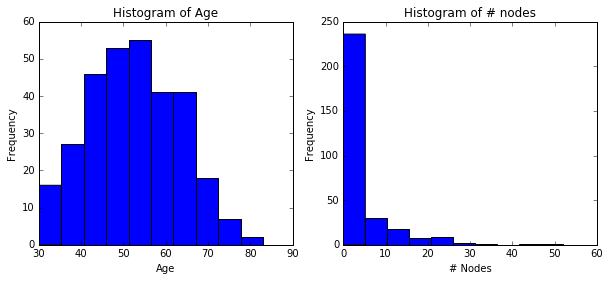

In [360]:
# Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
fig = plt.figure(figsize=(10,4))

ax = plt.subplot(1, 2, 1)
ax.hist(haberman['Age'])
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Age')

ax = plt.subplot(1, 2, 2)
ax.hist(haberman['Nodes'])
ax.set_xlabel('# Nodes')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # nodes')

In [363]:
# What is the earliest year of surgery in this dataset?
print '19' + str(haberman['Year'].min())

1958


In [364]:
# What is the most recent year of surgery?
print '19' + str(haberman['Year'].max())

1969


In [ ]:
# Use logistic regression to predict survival after 5 years. How well does your model do?
y = haberman['Survival']
X = haberman.drop('Survival', axis=1)
mod = LogisticRegression()
print "Logistic Regression Accuracy: %.3f"%(np.mean(cross_val_score(mod,X,y)))
print "Logistic Regression F1: %.3f"%(np.mean(cross_val_score(mod,X,y, scoring='f1')))

In [375]:
# What are the coefficients of logistic regression? Which features affect the outcome how?
mod = LogisticRegression()
mod.fit(X,y)

featureRank = sorted(zip(X.columns, mod.coef_[0]), key=lambda x: abs(x[1]))
for (f,v) in featureRank:
    print "%s: %.4f"%(f,v)

Age: 0.0185
Year: -0.0345
Nodes: 0.0881


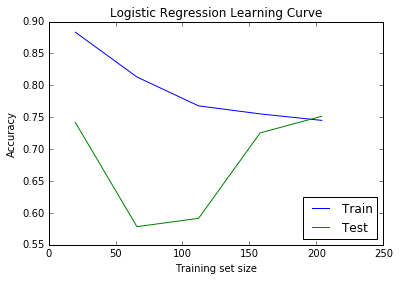

In [376]:
# Draw the learning curve for logistic regression in this case.
(train_size, train_err, ts_err) = learning_curve(LogisticRegression(), X, y)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

fig, ax = plt.subplots()
ax.plot(train_size, train_cv_err)
ax.plot(train_size, test_cv_err)
ax.legend(['Train', 'Test'], loc='lower right')
ax.set_xlabel('Training set size')
ax.set_ylabel('Accuracy')
ax.set_title('Logistic Regression Learning Curve')
plt.show()